In [72]:
print("URK22CS1173")
from google.colab import drive
drive.mount('/content/drive')

URK22CS1173
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
print("URK22CS1173")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

URK22CS1173


In [74]:
print("URK22CS1173")
data = pd.read_csv("/content/drive/MyDrive/ML lab dataset/Heart.csv")

URK22CS1173


In [75]:
print("URK22CS1173")
data

URK22CS1173


,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal
0,145,233,1,2,150,0,2.3,3,0,fixed
1,160,286,0,2,108,1,1.5,2,3,normal
2,120,229,0,2,129,1,2.6,2,2,reversable
3,130,250,0,0,187,0,3.5,3,0,normal
4,130,204,0,2,172,0,1.4,1,0,normal
...,...,...,...,...,...,...,...,...,...,...
298,110,264,0,0,132,0,1.2,2,0,reversable
299,144,193,1,0,141,0,3.4,2,2,reversable
300,130,131,0,0,115,1,1.2,2,1,reversable
301,130,236,0,2,174,0,0.0,2,1,normal


Pre-process the data and fill the missing values and apply normalization

Apply label encoding to convert the categorical values to numerical values

In [76]:
print("URK22CS1173")
label_encoder = LabelEncoder()
data['Thal'] = label_encoder.fit_transform(data['Thal'])


URK22CS1173


In [77]:
print("URK22CS1173")
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

URK22CS1173


 Prepare train (75%) and test set (25%)

In [78]:
print("URK22CS1173")
X_train, X_test = train_test_split(data_scaled, test_size=0.25, random_state=42)

URK22CS1173


Arrive at the model to classify thal


In [79]:
print("URK22CS1173")
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))



URK22CS1173


In [80]:
    print("URK22CS1173")
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)



URK22CS1173


In [81]:
    print("URK22CS1173")
    def forward(self, X):
        # Forward propagation
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)  # Output
        return self.A2



URK22CS1173


In [82]:
    print("URK22CS1173")
    def backward(self, X, y, output):
        m = X.shape[0]

        dZ2 = (output - y) * self.sigmoid_derivative(output)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dZ1 = np.dot(dZ2, self.W2.T) * self.sigmoid_derivative(self.A1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2


URK22CS1173


In [83]:
    print("URK22CS1173")
    def train(self, X, y, epochs=1000):
        for i in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            if i % 100 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {i}, Loss: {loss:.4f}")


URK22CS1173


In [84]:
    print("URK22CS1173")
    def predict(self, X):
        output = self.forward(X)
        return (output > 0.5).astype(int)

URK22CS1173


In [85]:
print("URK22CS1173")
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Convert labels for binary classification (Example: Using 'Fbs' as target variable)
y_train = X_train[:, 2].reshape(-1, 1)  # Column index 2 is 'Fbs'
y_test = X_test[:, 2].reshape(-1, 1)


URK22CS1173


In [86]:
print("URK22CS1173")
y_test = (y_test > 0.5).astype(int)

URK22CS1173


In [87]:
print("URK22CS1173")
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        # Forward propagation
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)  # Output
        return self.A2

    def backward(self, X, y, output):
        m = X.shape[0]

        dZ2 = (output - y) * self.sigmoid_derivative(output)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dZ1 = np.dot(dZ2, self.W2.T) * self.sigmoid_derivative(self.A1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        # Update weights
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2

    def train(self, X, y, epochs=1000):
        for i in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            if i % 100 == 0:
                loss = np.mean(np.square(y - output))
                print(f"Epoch {i}, Loss: {loss:.4f}")

    def predict(self, X):
        output = self.forward(X)
        return (output > 0.5).astype(int)

URK22CS1173


In [88]:
print("URK22CS1173")
mlp = MLP(input_size=X_train.shape[1], hidden_size=5, output_size=1, learning_rate=0.1)
mlp.train(X_train, y_train, epochs=1000)

URK22CS1173
Epoch 0, Loss: 1.2102
Epoch 100, Loss: 0.9460
Epoch 200, Loss: 0.9080
Epoch 300, Loss: 0.8852
Epoch 400, Loss: 0.8615
Epoch 500, Loss: 0.8314
Epoch 600, Loss: 0.7913
Epoch 700, Loss: 0.7406
Epoch 800, Loss: 0.6844
Epoch 900, Loss: 0.6313


Plot the training curve (No of iterations / Training Error)

URK22CS1173


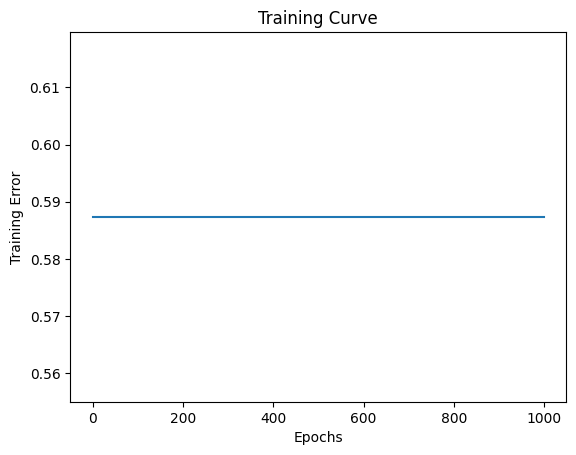

In [89]:
print("URK22CS1173")
loss_values = [np.mean(np.square(y_train - mlp.forward(X_train))) for _ in range(1000)]
plt.plot(range(1000), loss_values)
plt.xlabel("Epochs")
plt.ylabel("Training Error")
plt.title("Training Curve")
plt.show()


In [90]:
print("URK22CS1173")
y_pred_test = mlp.predict(X_test)

URK22CS1173


Display the confusion table and calculate the accuracy, precision and recall, f-
score etc

In [91]:
print("URK22CS1173")
conf_matrix = confusion_matrix(y_test, y_pred_test)
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test, zero_division=1)
recall = recall_score(y_test, y_pred_test, zero_division=1)
f1 = f1_score(y_test, y_pred_test, zero_division=1)

URK22CS1173


In [92]:
print("URK22CS1173")
print("Confusion Matrix:\n", conf_matrix)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

URK22CS1173
Confusion Matrix:
 [[61  0]
 [ 0 15]]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


In [93]:
print("URK22CS1173")
# Experiment with different hyperparameters
mlp_tuned = MLP(input_size=X_train.shape[1], hidden_size=10, output_size=1, learning_rate=0.05)
mlp_tuned.train(X_train, y_train, epochs=1500)

# Predictions
y_pred_test_tuned = mlp_tuned.predict(X_test)

# New accuracy score
accuracy_tuned = accuracy_score(y_test, y_pred_test_tuned)
print(f"Tuned Model Accuracy: {accuracy_tuned:.4f}")


URK22CS1173
Epoch 0, Loss: 1.2060
Epoch 100, Loss: 0.9648
Epoch 200, Loss: 0.9288
Epoch 300, Loss: 0.9141
Epoch 400, Loss: 0.9047
Epoch 500, Loss: 0.8971
Epoch 600, Loss: 0.8899
Epoch 700, Loss: 0.8822
Epoch 800, Loss: 0.8736
Epoch 900, Loss: 0.8635
Epoch 1000, Loss: 0.8515
Epoch 1100, Loss: 0.8369
Epoch 1200, Loss: 0.8195
Epoch 1300, Loss: 0.7987
Epoch 1400, Loss: 0.7744
Tuned Model Accuracy: 0.8026
